# class to find minimum of function in R^3

### wymiana jednego osobnika na generację

In [32]:
import numpy as np

class GeneticAlgorithm:
    def __init__(self, funkcja_celu, rozmiar_populacji=100, wymiar=3, min_val=-10, max_val=10, 
                 prawdopodobienstwo_mutacji=0.2, prawdopodobienstwo_krzyzowania=0.7):
        self.funkcja_celu = funkcja_celu
        np.random.seed(10)
        self.rozmiar_populacji = rozmiar_populacji
        self.wymiar = wymiar
        self.min_val = min_val
        self.max_val = max_val
        self.prawdopodobienstwo_mutacji = prawdopodobienstwo_mutacji
        self.prawdopodobienstwo_krzyzowania = prawdopodobienstwo_krzyzowania

    def inicjalizacja_populacji(self):
        return np.random.uniform(self.min_val, self.max_val, size=(self.rozmiar_populacji, self.wymiar))

    def selekcja(self, populacja, oceny):
        indeksy = np.random.choice(len(populacja), 2, replace=False)
        return populacja[indeksy[np.argmin(oceny[indeksy])]]

    def krzyzowanie_jednopunktowe(self, rodzic1, rodzic2):
        punkt_krzyzowania = np.random.randint(1, self.wymiar)
        dziecko = np.concatenate((rodzic1[:punkt_krzyzowania], rodzic2[punkt_krzyzowania:]))
        return dziecko

    def mutacja_gaussowska(self, dziecko):
        mutated_child = dziecko + np.random.normal(0, 1, size=dziecko.shape)
        mutated_child = np.clip(mutated_child, self.min_val, self.max_val)
        return mutated_child

    def ewolucja(self, liczba_iteracji):
        populacja = self.inicjalizacja_populacji()
        for _ in range(liczba_iteracji):
            oceny = np.array([self.funkcja_celu(x) for x in populacja])
            najlepszy = populacja[np.argmin(oceny)]
            rodzic1 = self.selekcja(populacja, oceny)
            rodzic2 = self.selekcja(populacja, oceny)
            if np.random.rand() < self.prawdopodobienstwo_krzyzowania:
                dziecko = self.krzyzowanie_jednopunktowe(rodzic1, rodzic2)
            else: dziecko = rodzic1
            if np.random.rand() < self.prawdopodobienstwo_mutacji:
                dziecko = self.mutacja_gaussowska(dziecko)
            populacja = np.vstack((populacja, dziecko))
            oceny = np.array([self.funkcja_celu(x) for x in populacja])
            najgorszy_indeks = np.argmax(oceny)
            populacja = np.delete(populacja, najgorszy_indeks, axis=0)
        najlepszy = populacja[np.argmin(oceny)]
        return najlepszy

In [24]:
def funkcja_kwadratowa(x):
    return x[0]**2 + x[1]**2 + x[2]**2

ga = GeneticAlgorithm(funkcja_kwadratowa)
minimum = ga.ewolucja(1000)
print("Minimum funkcji w R^3:", minimum)

Minimum funkcji w R^3: [0.04951392 0.02399347 0.17180281]


# wizualizacja

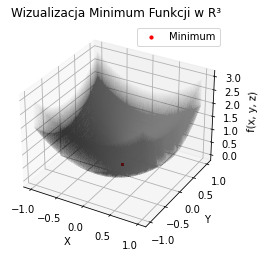

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definicja funkcji celu
def func(x, y, z):
    return x**2 + y**2 + z**2

# Znalezione minimum funkcji
min_point = np.array([0.04951392, 0.02399347, 0.17180281])

# Generowanie siatki punktów w przestrzeni 3D
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
z = np.linspace(-1, 1, 100)
X, Y, Z = np.meshgrid(x, y, z)
F = func(X, Y, Z)

# Przygotowanie wykresu 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Rysowanie powierzchni funkcji w kolorze szarym
for i in range(len(z)):
    ax.plot_surface(X[:, :, i], Y[:, :, i], F[:, :, i], color='gray', alpha=0.01)  # Zwiększenie przezroczystości

# Dodanie punktu minimum
ax.scatter(min_point[0], min_point[1], min_point[2], color='r', s=10, label='Minimum', depthshade=False)  # Większy punkt i bez cieniowania

# Ustawienia osi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y, z)')
ax.set_title('Wizualizacja Minimum Funkcji w R³')
ax.legend()

# Wyświetlenie wykresu
plt.show()


In [25]:
def funkcja_kwadratowa(x):
    return x[0]**2 + x[1]**2 + 2*x[2]**2

ga = GeneticAlgorithm(funkcja_kwadratowa)
minimum = ga.ewolucja(10000)
print("Minimum funkcji w R^3:", minimum)

Minimum funkcji w R^3: [-3.38967491e-02 -3.99903223e-02 -5.80082264e-06]


In [33]:
def funkcja_rastrigina(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

ga = GeneticAlgorithm(funkcja_rastrigina, rozmiar_populacji=100, wymiar=5, min_val=-5.12, max_val=5.12)
minimum = ga.ewolucja(100)
print("Minimum funkcji w R^3:", minimum)

Minimum funkcji w R^3: [ 3.2083567   2.9170352  -1.09138829  3.73226694 -1.18752493]


# wymiana całej generacji naraz

In [4]:
import numpy as np

class GeneticAlgorithm:
    def __init__(self, funkcja_celu, rozmiar_populacji=100, wymiar=3, min_val=-10, max_val=10, 
                 prawdopodobienstwo_mutacji=0.2, prawdopodobienstwo_krzyzowania=0.7):
        self.funkcja_celu = funkcja_celu
        np.random.seed(10)
        self.rozmiar_populacji = rozmiar_populacji
        self.wymiar = wymiar
        self.min_val = min_val
        self.max_val = max_val
        self.prawdopodobienstwo_mutacji = prawdopodobienstwo_mutacji
        self.prawdopodobienstwo_krzyzowania = prawdopodobienstwo_krzyzowania

    def inicjalizacja_populacji(self):
        return np.random.uniform(self.min_val, self.max_val, size=(self.rozmiar_populacji, self.wymiar))

    def selekcja(self, populacja, oceny):
        indeksy = np.random.choice(len(populacja), 2, replace=False)
        return populacja[indeksy[np.argmin(oceny[indeksy])]]

    def krzyzowanie_jednopunktowe(self, rodzic1, rodzic2):
        punkt_krzyzowania = np.random.randint(1, self.wymiar)
        dziecko = np.concatenate((rodzic1[:punkt_krzyzowania], rodzic2[punkt_krzyzowania:]))
        return dziecko

    def mutacja_gaussowska(self, dziecko):
        mutated_child = dziecko + np.random.normal(0, 1, size=dziecko.shape)
        mutated_child = np.clip(mutated_child, self.min_val, self.max_val)
        return mutated_child

    import numpy as np

    def ewolucja(self, liczba_iteracji):
        populacja = self.inicjalizacja_populacji()
        prawdopodobienstwo_krzyzowania = 0.7
        prawdopodobienstwo_mutacji = 0.2

        for _ in range(liczba_iteracji):
            oceny = np.array([self.funkcja_celu(x) for x in populacja])
            najlepszy = populacja[np.argmin(oceny)]
            
            nowa_populacja = []

            for _ in range(len(populacja)):
                rodzic1 = self.selekcja(populacja, oceny)
                rodzic2 = self.selekcja(populacja, oceny)

                if np.random.rand() < prawdopodobienstwo_krzyzowania:
                    dziecko = self.krzyzowanie_jednopunktowe(rodzic1, rodzic2)
                else: dziecko = rodzic1  

                if np.random.rand() < prawdopodobienstwo_mutacji:
                    dziecko = self.mutacja_gaussowska(dziecko)

                nowa_populacja.append(dziecko)

            populacja = np.array(nowa_populacja)
        
        oceny = np.array([self.funkcja_celu(x) for x in populacja])
        najlepszy = populacja[np.argmin(oceny)]
        return najlepszy


In [29]:
def funkcja_kwadratowa(x):
    return x[0]**2 + x[1]**2 + x[2]**2

ga = GeneticAlgorithm(funkcja_kwadratowa)
minimum = ga.ewolucja(100)
print("Minimum funkcji w R^3:", minimum)

Minimum funkcji w R^3: [ 0.01297993  0.01037363 -0.03903633]


In [30]:
def funkcja_kwadratowa(x):
    return x[0]**2 + x[1]**2 + x[2]**2

ga = GeneticAlgorithm(funkcja_kwadratowa)
minimum = ga.ewolucja(1000)
print("Minimum funkcji w R^3:", minimum)

Minimum funkcji w R^3: [-1.57133376e-03  3.47976520e-04 -8.48383231e-05]


In [5]:
def funkcja_rastrigina(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

ga = GeneticAlgorithm(funkcja_rastrigina, rozmiar_populacji=100, wymiar=3, min_val=-5.12, max_val=5.12)
minimum = ga.ewolucja(1000)
print("Minimum funkcji w R^3:", minimum)

Minimum funkcji w R^3: [-0.00141726  0.0085555  -0.00122134]


In [6]:
def funkcja_rastrigina(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

ga = GeneticAlgorithm(funkcja_rastrigina, rozmiar_populacji=1000, wymiar=5, min_val=-5.12, max_val=5.12)
minimum = ga.ewolucja(1000)
print("Minimum funkcji w R^3:", minimum)

Minimum funkcji w R^3: [-3.63409019e-04 -4.98970784e-04  7.36224481e-04  9.05237335e-05
  1.18455229e-04]


In [37]:
def funkcja_rastrigina(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

ga = GeneticAlgorithm(funkcja_rastrigina, rozmiar_populacji=100, wymiar=5, min_val=-5.12, max_val=5.12)
minimum = ga.ewolucja(1000)
print("Minimum funkcji w R^3:", minimum)

Minimum funkcji w R^3: [-0.05070202 -1.06043516  0.05180536  0.05300625  0.96777961]


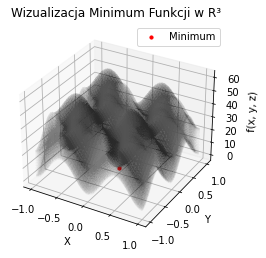

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definicja funkcji celu
def func(x, y, z):
    A = 10
    return 3 * A + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y)) + (z**2 - A * np.cos(2 * np.pi * z))

# Znalezione minimum funkcji
min_point = np.array([0,  0,  0])

# Generowanie siatki punktów w przestrzeni 3D
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
z = np.linspace(-1, 1, 100)
X, Y, Z = np.meshgrid(x, y, z)
F = func(X, Y, Z)

# Przygotowanie wykresu 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Rysowanie powierzchni funkcji w kolorze szarym
for i in range(len(z)):
    ax.plot_surface(X[:, :, i], Y[:, :, i], F[:, :, i], color='gray', alpha=0.01)  

# Dodanie punktu minimum
ax.scatter(min_point[0], min_point[1], min_point[2], color='r', s=10, label='Minimum', depthshade=False)  # Większy punkt i bez cieniowania

# Ustawienia osi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y, z)')
ax.set_title('Wizualizacja Minimum Funkcji w R³')
ax.legend()

# Wyświetlenie wykresu
plt.show()